In [2]:
#資料處理
dataPath=r'iris_org.csv'
dataList=[]
import csv
with open(dataPath, "r", newline="") as csvData:
  reader = csv.reader(csvData)
  for r in reader:
     dataList.append(r)
featrueName=[]#特徵屬性名稱
featrueData=[]#特徵屬性Data
ClassData=[]#ClassData
for r in range(0,len(dataList)):
  if(r==0):
    featrueName=dataList[r]
  else:
    data=[]
    dataAll=[]
    ClassData.append(dataList[r][len(dataList[r])-1])
    for c in range(0,len(dataList[r])):
      if(c<len(dataList[r])-1):
        data.append(float(dataList[r][c]))
    featrueData.append(data)


In [3]:
#Purity計算
def Purity(Cluster,ClassData):
    cSet=[]
    for c in range(0,len(Cluster)):
        isNotSave=True
        for cs in range(0,len(cSet)):
            if(cSet[cs]==Cluster[c]):
                isNotSave=False
                break
        if(isNotSave):
            cSet.append(Cluster[c])
    classSet=[]
    for a in range(0,len(ClassData)):
        isNotSave=True
        for cs in range(0,len(classSet)):
            if(classSet[cs]==ClassData[a]):
                isNotSave=False
                break
        if(isNotSave):
            classSet.append(ClassData[a])
    cCount=[]
    for cs in range(0,len(cSet)):
        classCount=[]
        for c in range (0,len(classSet)):
            classCount.append(0)
        for cl in range(0,len(Cluster)):
            if(cSet[cs]==Cluster[cl]):
                for c in range (0,len(classSet)):
                    if(ClassData[cl]==classSet[c]):
                        classCount[c]+=1
                        break;
        cCount.append(classCount)
    rowCount=[]
    maxCount=[]
    for c in range(0,len(cCount)):
        rowCount.append(0)
        maxCount.append(0)
    sumCount=0
    for c in range(0,len(cCount)):
        for r in range(0,len(cCount[c])):
            rowCount[c]+=cCount[c][r]
            sumCount+=cCount[c][r]
            if(maxCount[c]<cCount[c][r]):
                maxCount[c]=cCount[c][r]
    
    avg=0
    for a in range(0,len(rowCount)):
        avg+=(maxCount[a]/rowCount[a])*(rowCount[a]/sumCount)
    return str(avg)
    

執行時間：0.055002 秒
Purity:0.96


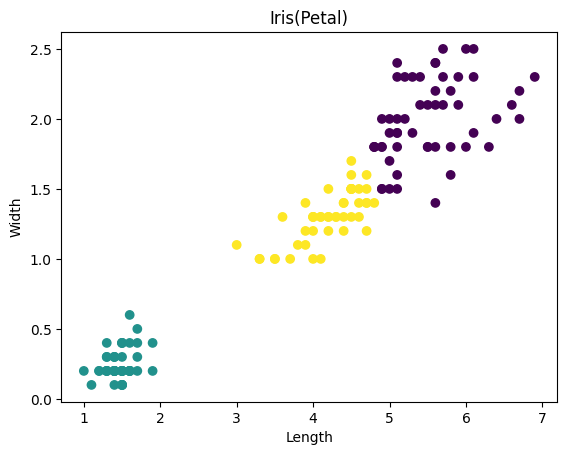

In [4]:
#層次聚類 by 花瓣長度、花瓣寬度
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import numpy as np
X=np.array(featrueData)
X=X[:,2:4]
ml=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
import time
timeStart=time.time()
ml.fit_predict(X)
timeFinish=time.time()
print("執行時間：%f 秒" % (timeFinish - timeStart))
print("Purity:"+Purity(ml.fit_predict(X),ClassData))
plt.scatter(X[:,0],X[:,1],c=ml.fit_predict(X))
plt.title("Iris(Petal)")
plt.xlabel("Length")
plt.ylabel("Width")
plt.show()

執行時間：0.002011 秒
Purity:0.7666666666666667


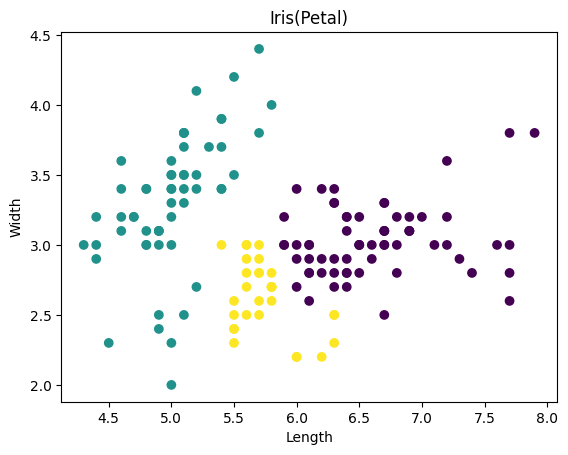

In [5]:
#層次聚類 by 萼片長度、萼片寬度
X=np.array(featrueData)
X=X[:,0:2]
ml=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
import time
timeStart=time.time()
ml.fit_predict(X)
timeFinish=time.time()
print("執行時間：%f 秒" % (timeFinish - timeStart))
print("Purity:"+Purity(ml.fit_predict(X),ClassData))
plt.scatter(X[:,0],X[:,1],c=ml.fit_predict(X))
plt.title("Iris(Sepal)")
plt.xlabel("Length")
plt.ylabel("Width")
plt.show()

In [6]:
#層次聚類 by 完整
X=np.array(featrueData)
ml=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
import time
timeStart=time.time()
ml.fit_predict(X)
timeFinish=time.time()
print("執行時間：%f 秒" % (timeFinish - timeStart))
print("Purity:"+Purity(ml.fit_predict(X),ClassData))

執行時間：0.001999 秒
Purity:0.8933333333333332
